Link do meu vídeo descrevendo o projeto.

https://youtu.be/LfmteGVTztU

# Configuração Inicial:

 Importando módulo básicos do **matplotlib** para plotar figuras:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings(action="ignore", message="^internal gelsd")

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
seed = 42
np.random.seed(seed)

# Obter os dados:

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
housing_ar = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Vamos visualizar as primeiras linhas do dataframe:

In [ ]:
boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.DataFrame(housing_ar, columns=boston_columns[0:13])
data['MEDV'] = target

 Coletar uma amostra contendo 10 instâncias para visualizar os dados:

In [ ]:
data.sample(n = 10, random_state = seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97,20.0
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87,19.6
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8


Informações sobre as variáveis do problema:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


 É importante também saber como esse dataset foi construído. Este conjunto de dados contém informações coletadas pelo US Census Service sobre moradia na área de Boston, Massachusetts. Foi obtido do arquivo StatLib ( http://lib.stat.cmu.edu/datasets/boston ), e tem sido usado extensivamente em toda a literatura para algoritmos de benchmark. No entanto, essas comparações foram feitas principalmente fora do Delve e, portanto, são um tanto suspeitas. O conjunto de dados é pequeno em tamanho, com apenas 506 casos. As características (features) são as seguintes:

* CRIM: taxa de criminalidade per capita por cidade
* ZN: proporção de terrenos residenciais zoneados para lotes acima de 25.000 sq.ft.
* INDUS: proporção de acres de negócio não-varejista por cidade
* CHAS: variável dummy Charles River (1 se o trecho limita o rio; 0 caso contrário)
* NOX: concentração de óxidos nítricos (partes por 10 milhões)
* RM: número médio de cômodos por habitação
* AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
* DIS: distâncias ponderadas para cinco centros de emprego de Boston
* RAD: índice de acessibilidade às rodovias radiais
* TAX: taxa de imposto sobre a propriedade de valor total por $10,000
* PTRATIO: razão aluno-professor por cidade
* B: 1000(Bk - 0.63)^2 onde Bk é a proporção de pessoas de descendência afro-americana por cidade
* LSTAT: porcentagem de status inferior da população
* MEDV: valor mediano das casas ocupadas pelo proprietário em $1000

Extrair algumas medidas resumo do nosso conjunto de dados:

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Histogramas também são úteis para compreender o problema:

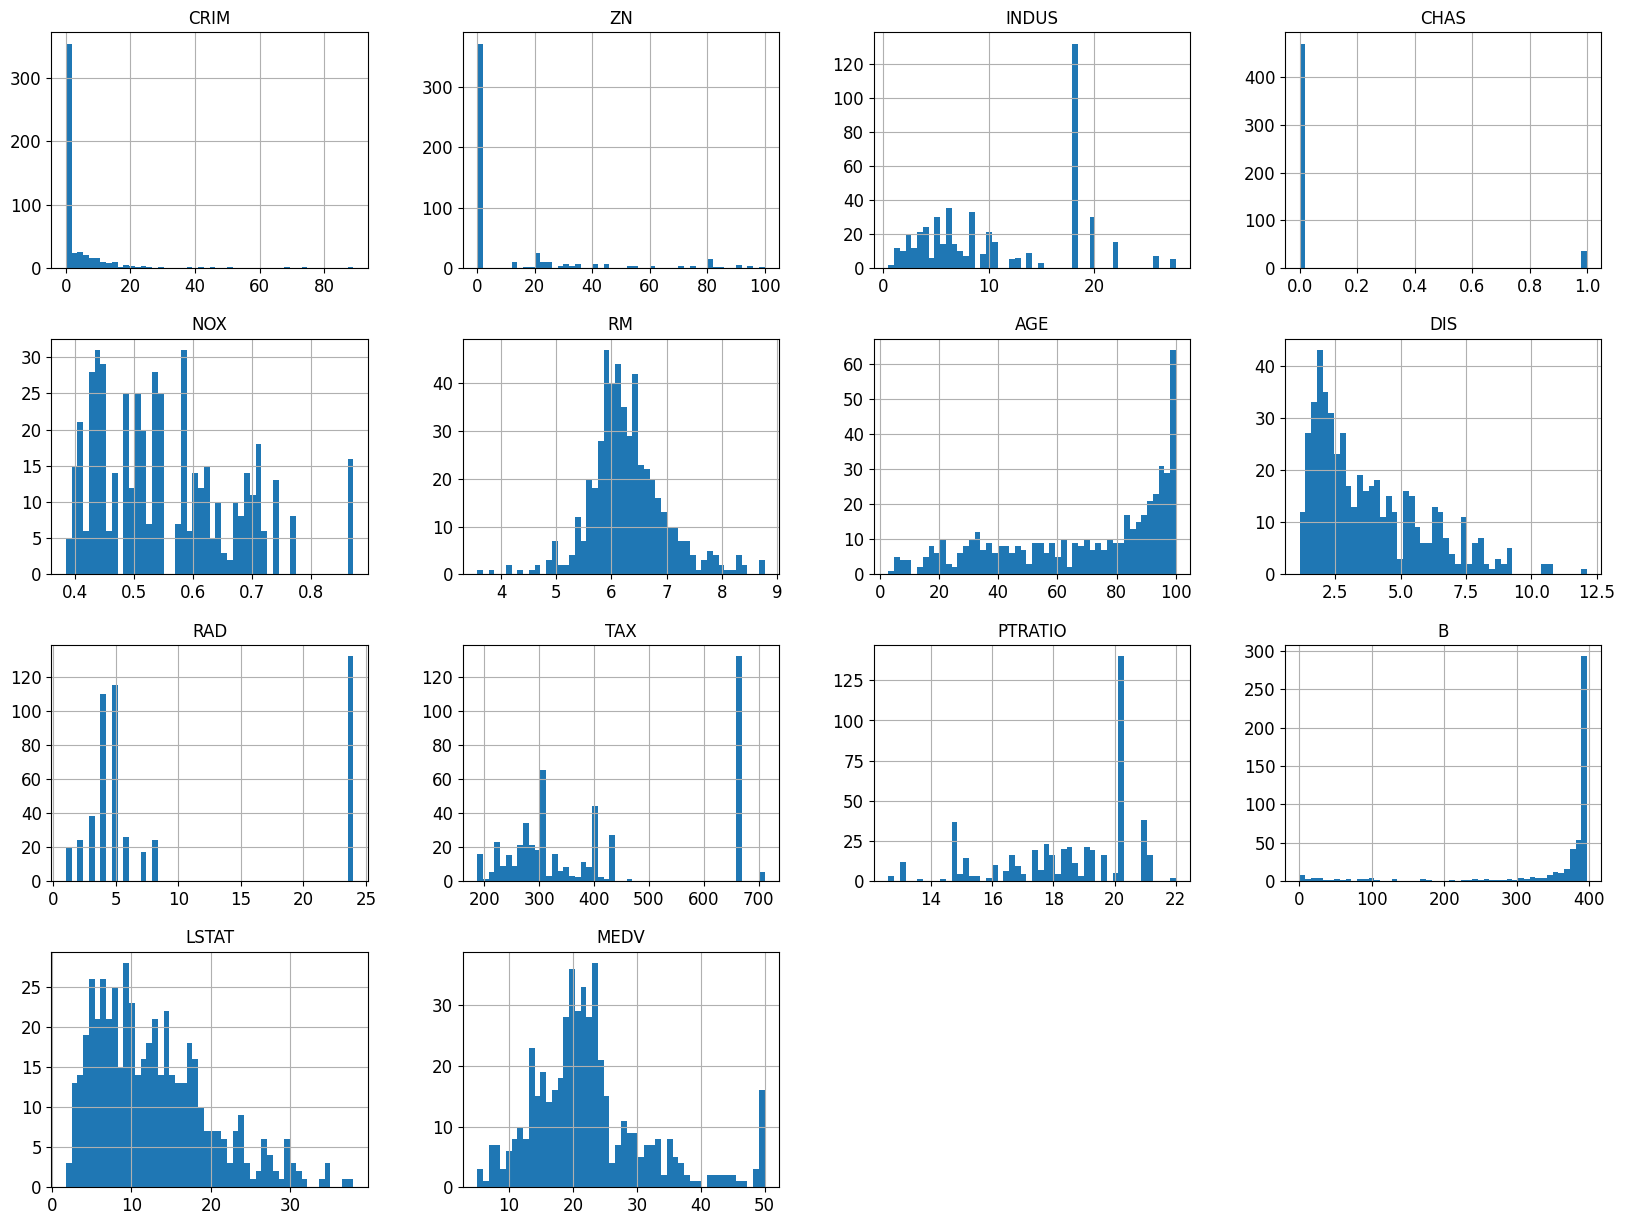

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Separando o conjunto de dados:

A função train_test_split da biblioteca scikit-learn é amplamente utilizada para dividir um conjunto de dados em dois subconjuntos: um para treinamento e outro para teste. Isso é essencial para a construção e avaliação de modelos de machine learning.

```
- data: Conjunto de dados completo que será dividido.
- test_size=0.2: Define que 20% dos dados serão usados para o conjunto de teste e 80% para o conjunto de treino.
- random_state=seed: Garante que a divisão seja reprodutível (ou seja, sempre que o código for executado com o mesmo valor de seed, a divisão será a mesma).  

```
O resultado é:
```
- train_set: Subconjunto usado para treinar o modelo.
- test_set: Subconjunto usado para testar o desempenho do modelo depois que ele foi treinado.

```

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


Importância da Separação acima:

Dividir os dados em treino e teste é fundamental para evitar **overfitting** e garantir uma avaliação justa do modelo. Veja por quê:

**Conjunto de treino:** O modelo aprende padrões e ajusta seus parâmetros com base nesses dados.
**Conjunto de teste:** É usado para avaliar a capacidade do modelo de generalizar para dados que ele nunca viu antes.

**Se não houvesse uma divisão, seria difícil saber se o modelo realmente aprendeu a generalizar ou apenas decorou as respostas (overfitting).**

Resumindo, essa função é uma maneira simples e eficiente de dividir os dados em duas partes, garantindo uma avaliação justa do modelo e evitando sobreajuste. O uso de um teste com dados “novos” é essencial para entender a capacidade de generalização do modelo, e o parâmetro random_state ajuda a garantir que os experimentos sejam consistentes.



---

Para evitar data leakage, primeiro separamos os dados em treino e teste usando train_test_split. Em seguida, aplicamos transformações (como normalização) ajustando o escalador apenas no conjunto de treino . Para o teste, aplicando a mesma escala sem recalcular estatísticas. Isso garante que o modelo só veja informações do treino, evitando que dados do teste vazem, o que simula melhor seu desempenho real e previne snooping e overfitting.


# Visualização da estrutura de dados:

In [ ]:
data = train_set.copy()

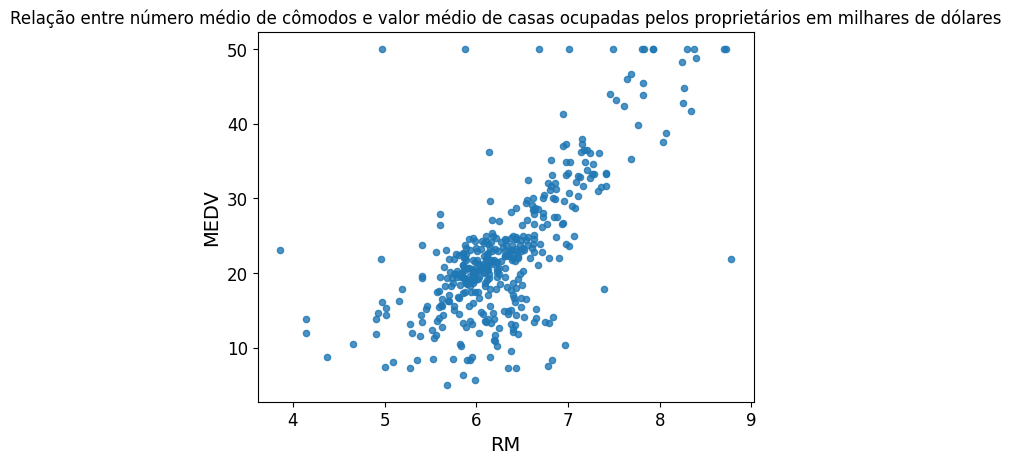

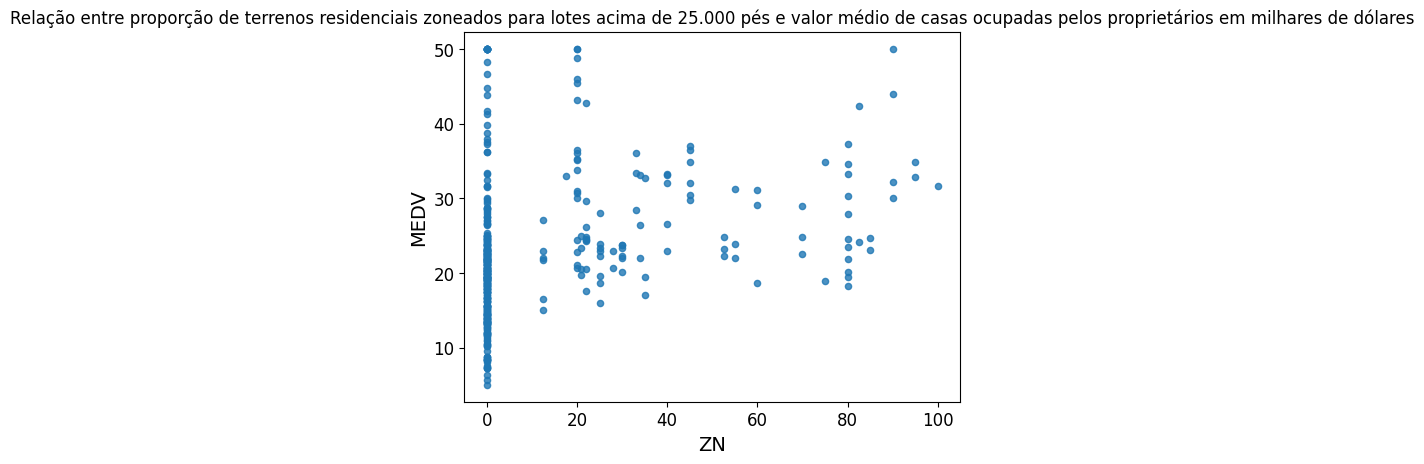

In [ ]:
data.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
plt.title("Relação entre número médio de cômodos e valor médio de casas ocupadas pelos proprietários em milhares de dólares")
plt.show()

data.plot(kind="scatter", x="ZN", y="MEDV", alpha=0.8)
plt.title("Relação entre proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés e valor médio de casas ocupadas pelos proprietários em milhares de dólares")
plt.show()

Correlações entre as Variáveis:

In [ ]:
corr_matrix = data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.710680
B,0.339918
ZN,0.309504
DIS,0.235114
CHAS,0.190642
AGE,-0.340216
CRIM,-0.380091
RAD,-0.387467
NOX,-0.415768


# Gráficos de Disperção:

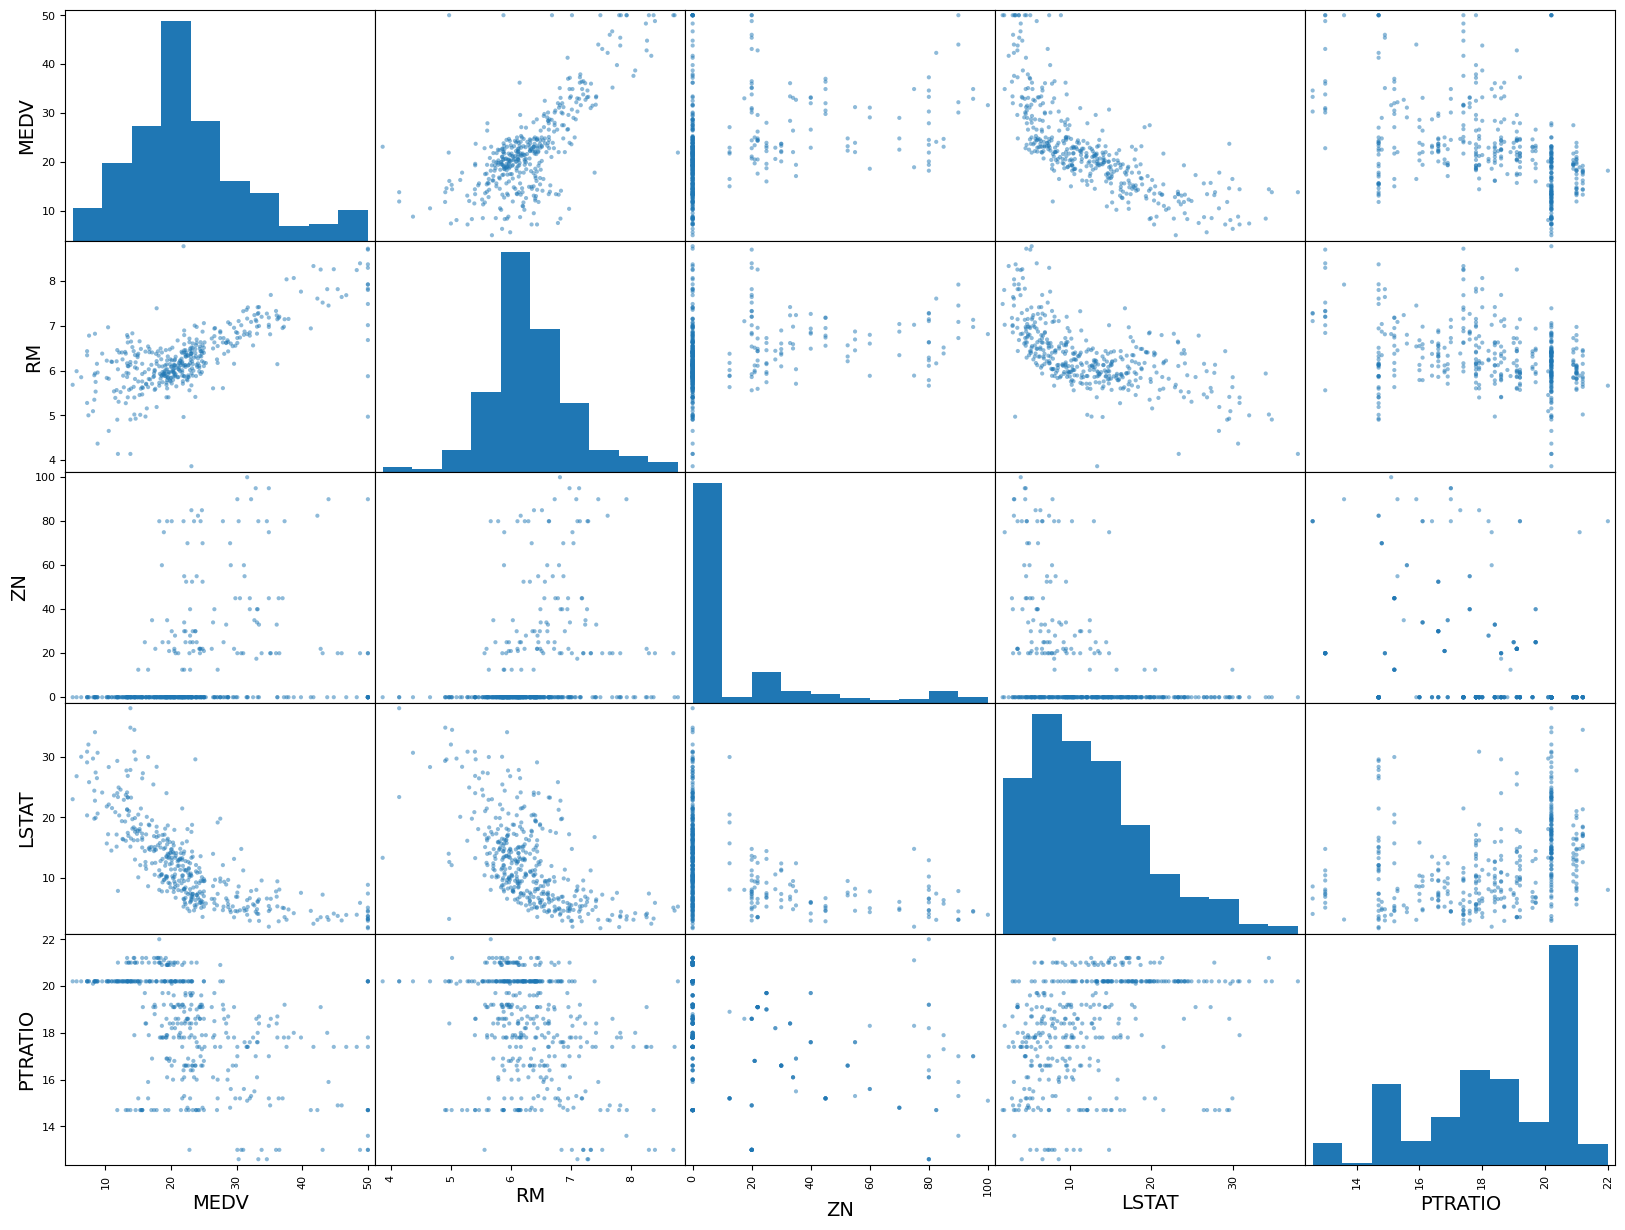

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "ZN", "LSTAT", "PTRATIO"]
scatter_matrix(data[attributes], figsize=(20, 15))
plt.show()

A ideia é que se um DataSet tem colunas/linhas vazias sejam imputados esses dados faltantes para seguir as análises e aplicar os métodos.
A função abaixo confere se não existe nenhuma entrada na tabela sem valores ou dados duplicados a serem limpos:

In [ ]:
print('Tem entradas vazias?:', data.isnull().any().any())

Tem entradas vazias?: False


In [ ]:
print('Tem dados duplicados?:', data.duplicated().values.any())


Tem dados duplicados?: False


# Separando os dados de treino em matriz de características (X) e vetor de saída (y)

In [ ]:
X_train, y_train = train_set.drop(columns=['MEDV']), train_set['MEDV'].copy()

## Evitando "Snooping Bias/Data Leakage"

Os dados são devidamente separados em conjuntos de treino e teste desde o início do processo. Asseguramo que, em todas as etapas apenas o conjunto de treino foi utilizado. Isso é importante para evitar Snooping Bias/Data Leakage. Dessa forma, podemos confiar que o desempenho do nosso modelo refletirá o grau de generalização quando utilizados outros dados.

# Regressão Linear:

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

metrics = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2'])


def compute_metrics(name, y_true, y_pred):
    mse_value = mse(y_true, y_pred)

    metrics.loc[f"{name}"] = [
        mse_value,
        np.sqrt(mse_value),
        mae(y_true, y_pred),
        r2(y_true, y_pred)
    ]

def compute_and_print_metrics(name, y_true, y_pred):
    compute_metrics(name, y_true, y_pred)
    print(metrics)

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_train)

compute_and_print_metrics('Regressão Linear', y_train, y_pred_linear)


                        MSE      RMSE       MAE        R2
Regressão Linear  21.641413  4.652033  3.314772  0.750886


# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(random_state=seed)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_train)

compute_and_print_metrics('Random Forest', y_train, y_pred_random)


                        MSE      RMSE       MAE        R2
Regressão Linear  21.641413  4.652033  3.314772  0.750886
Random Forest      1.978393  1.406553  0.903478  0.977227


# Decision Tree:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

tree = DecisionTreeRegressor(random_state=seed)

grid_search = GridSearchCV(tree, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_train)

compute_and_print_metrics('Decision Tree', y_train, y_pred_tree)

                             MSE      RMSE       MAE        R2
Regressão Linear       21.641413  4.652033  3.314772  0.750886
Random Forest           1.978393  1.406553  0.903478  0.977227
Decision Tree           0.000000  0.000000  0.000000  1.000000
Decision Tree (Tuned)   5.985247  2.446476  1.678929  0.931104


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Justificativa da escolha das métricas

A previsão de preços de imóveis é um problema de regressão, portanto, utilizamos métricas de erro para avaliar a performance do modelo.

- **MSE (Mean Squared Error - Erro Quadrático Médio):** Calcula a média dos erros ao quadrado. É vantajoso porque penaliza erros maiores de maneira mais intensa, ajudando a evitar discrepâncias significativas nas previsões.
- **RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio):** Corresponde à raiz quadrada do MSE, trazendo o erro para a mesma unidade dos dados originais, o que facilita a interpretação.
- **MAE (Mean Absolute Error - Erro Absoluto Médio):** Mede a média das diferenças absolutas entre os valores reais e os previstos. Essa métrica é resistente a outliers, pois não os penaliza de forma tão severa quanto o MSE.
- **R² (Coeficiente de Determinação):** Representa a proporção da variação dos preços explicada pelo modelo. Quanto mais próximo de 1, melhor o ajuste do modelo aos dados.

 O **MSE** e o **RMSE** são úteis para capturar a precisão das previsões, penalizando erros maiores, o que é fundamental, considerando que grandes variações nos preços das casas podem impactar significativamente decisões de compra e venda. Já o **R²** indica a capacidade do modelo em explicar a variação dos preços, refletindo o nível de ajuste aos dados. O **MAE** será utilizado apenas como uma métrica complementar.



***Por fim, O Decision Tree parece ser a melhor opção neste caso. Ele oferece um bom equilíbrio entre ajuste e generalização. O Random Forest também é uma boa opção, mas o Decision Tree parece ter um desempenho ligeiramente melhor.***

# Validação Cruzada:

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_validate(model):
  cv_Score1 = cross_val_score(model, X_train, y_train, cv = 5)
  cv_Score2 = cross_val_score(model, X_train, y_train, cv = 5,
                              scoring = 'neg_mean_squared_error')
  print("R2: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std() * 2))
  print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std() * 2))

In [ ]:
print("Resultados da validação cruzada - Regressão Linear:")
cross_validate(linear)

print("Resultados da validação cruzada - Decision Tree:")
cross_validate(tree)

print("Resultados da validação cruzada - Random Forest:")
cross_validate(random)

Resultados da validação cruzada - Regressão Linear:
R2: 0.724 (+/- 0.127)
Mean Squared Error: 23.654 (+/- 11.651)
Resultados da validação cruzada - Decision Tree:
R2: 0.669 (+/- 0.134)
Mean Squared Error: 28.892 (+/- 16.302)
Resultados da validação cruzada - Random Forest:
R2: 0.826 (+/- 0.095)
Mean Squared Error: 14.859 (+/- 8.491)


Com base nos resultados da validação cruzada, o modelo de Random Forest obteve o melhor desempenho. Ele apresenta o maior poder explicativo (R²) e o menor erro de previsão (MSE), além de ser mais estável. No entanto, ao avaliar o modelo com um conjunto de dados de teste, observei uma queda no desempenho, indicando um possível caso de overfitting. Esse fenômeno é comum quando o conjunto de dados de treinamento é limitado.

# Buscando os melhores parâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(estimator=random,
                    param_grid=param_grid,
                    cv=5,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_
best_score = -grid.best_score_

print('Modelo: RandomForest')
print(f'Melhor Score (MSE): {best_score}')
print(f'Melhores Parâmetros: {best_estimator}')


Modelo: RandomForest
Melhor Score (MSE): 13.228494456419753
Melhores Parâmetros: RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=42)


Validação Cruzada - GridSearch:

In [ ]:
cross_validate(grid.best_estimator_)

R2: 0.842 (+/- 0.088)
Mean Squared Error: 13.228 (+/- 4.480)


# Modelo e teste final

In [ ]:
final_model = grid.best_estimator_
final_model

RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=42)

In [ ]:
X_test, y_test = test_set.drop(columns=['MEDV']), test_set['MEDV'].copy()


y_pred_random_hyper = final_model.predict(X_test)
compute_metrics('Random Forest (hyper)', y_test, y_pred_random_hyper)
print(metrics.tail(1))

                             MSE      RMSE       MAE        R2
Random Forest (hyper)  10.689626  3.269499  2.068255  0.854233


Uma vez que os resultados de teste estão parecidos com os resultados da validação cruzada, podemos dizer que o modelo se comporta como o esperado. ✅